# Validation of Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import networkx as nx
import dowhy
import pandas as pd
from dowhy import CausalModel

style.use('fivethirtyeight') # bmh

import math
import dowhy.datasets, dowhy.plotter

import hyppo
import pingouin as pg
import conditional_independence

from hyppo.independence import Hsic

# the code below simple hides some warnings we don't want to see
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

path = "/Users/dj/Documents/GitHub/Causal_Data_Science/Project/Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']


# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

target[target[0] == -1] = 0

avgs = train[names].mean()

train["Lung_Cancer"] = np.array(target)

avgs = train.mean()


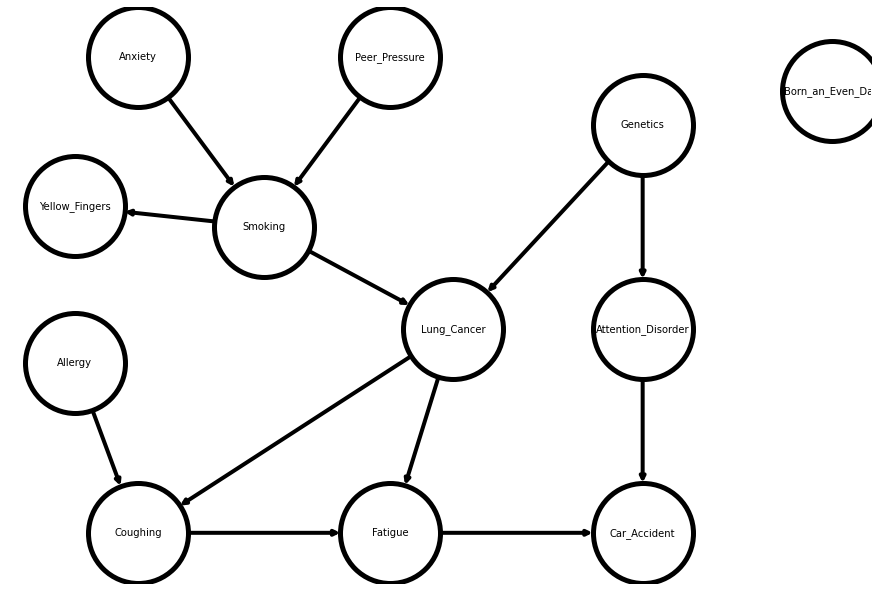

In [2]:
# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(12,8))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "backdoor_criterion_graph.gml")

plt.show()

In [97]:
def sigmoid(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x 
  else:
    t = coefs[0] + (x * coefs[1])
  return 1 / (1 + math.exp(-(inter + t)))



def p(x, coefs, inter): # Gives you the y-values
  if len(coefs) == 1:
    t = coefs[0] * x
  else:
    t = coefs[0] + (x * coefs[1])
  return math.exp((inter + t)) / (1 + math.exp((inter + t)))



def x_vals(p, coefs, inter): # gives you the x values
  if len(coefs) == 1:
    odd = np.log(p / 1 - p)
    x = (odd - inter) / coefs[0]
  else:
    odd = np.log(p / 1 - p)
    x = (odd - inter) / coefs[0]
  return math.exp((inter + t)) / (1 + math.exp((inter + t)))

In [98]:
x = np.arange(-20, 20,1)
coefs = [0.93930241]
coefs1 = [0.77547529, 0.37288989]

inter = 0.34006295
inter1 =  0.19306796

In [99]:
vals = []
for i in x:
    r = sigmoid(i, coefs, inter)
    vals.append(r)

vals1 = []
for i in x:
    r = sigmoid(i, coefs1, inter1)
    vals1.append(r)

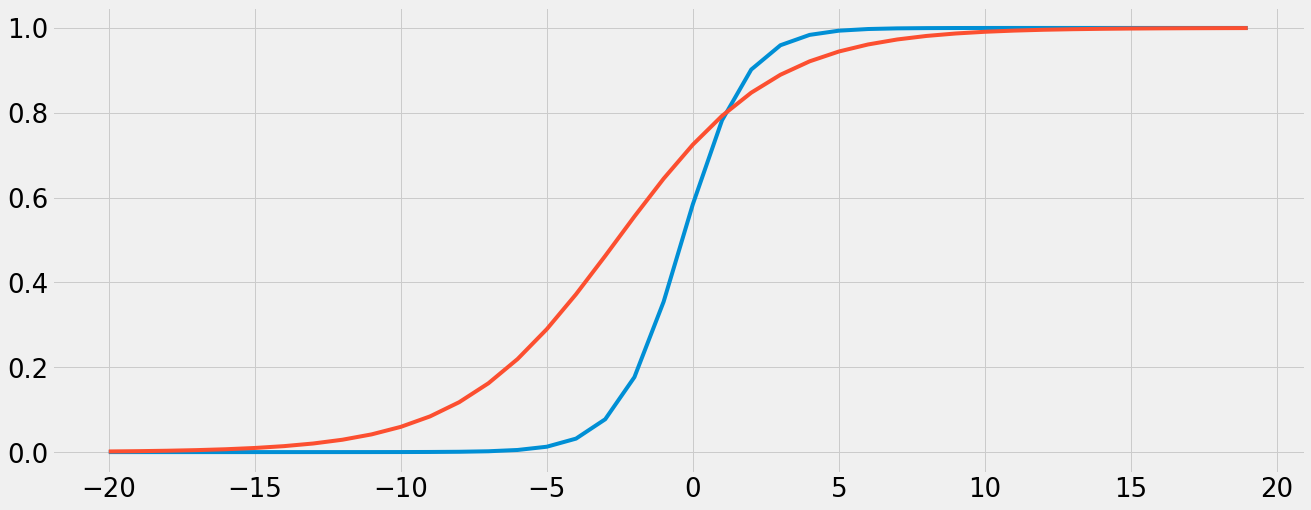

In [100]:
plt.figure(figsize=(20,8))
plt.plot(x,vals)
plt.plot(x, vals1)

In [90]:
from scipy.special import expit

x = 0.25
sig = expit(x)
sig

In [101]:
p(0, coefs1, inter1)

In [102]:
sigmoid(0, coefs1, inter1)

# 2D Implementation

In [163]:
def sigmoid2d(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x[0] 
  else:
    t = (coefs[0] * x[0]) + (x[1] * coefs[1])
  return 1 / (1 + math.exp(-(inter + t)))

def sigmoid2d_plot(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x 
  else:
    t = (coefs[0] * x) + (x * coefs[1])
  return 1 / (1 + math.exp(-(inter + t)))


def p2d(x, coefs, inter): # Gives you the y-values
  if len(coefs) == 1:
    t = coefs[0] * x[0]
  else:
    t = (coefs[0] * x[0]) + (x[1] * coefs[1])
  return math.exp((inter + t)) / (1 + math.exp((inter + t)))


# def x_vals(p, coefs, inter): # gives you the x values
#   if len(coefs) == 1:
#     odd = np.log(p / 1 - p)
#     x = (odd - inter) / coefs[0]
#   else:
#     odd = np.log(p / 1 - p)
#     x = (odd - inter) / coefs[0]
#   return math.exp((inter + t)) / (1 + math.exp((inter + t)))

In [170]:
x = np.arange(-5, 5,0.1)
coefs = [0.93930241]
coefs1 = [0.77547529, 0.37288989]

inter = 0.34006295
inter1 =  0.19306796

vals = []
for i in x:
    r = sigmoid2d_plot(i, coefs, inter)
    vals.append(r)

vals1 = []
for i in x:
    r = sigmoid2d_plot(i, coefs1, inter1)
    vals1.append(r)

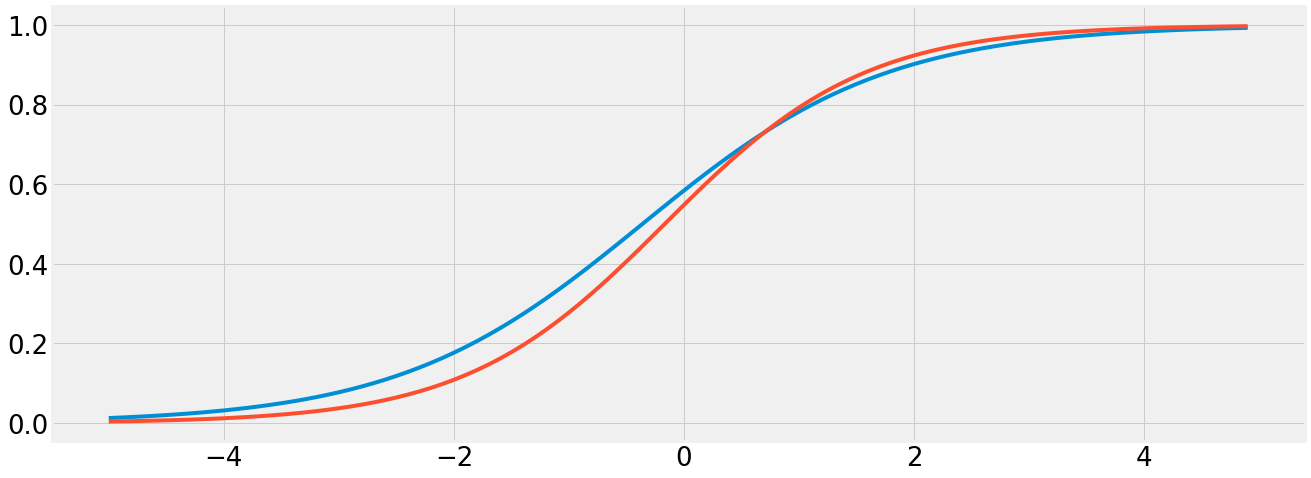

In [171]:
plt.figure(figsize=(20,8))
plt.plot(x,vals)
plt.plot(x, vals1)

In [175]:
x = [0,1]
sigmoid2d(x, coefs1, inter1)

In [177]:
p2d(x, coefs1, inter1)

In [184]:
p2d([-0.16, -0.16], coefs1, inter1)

### Comparing different Probabilities 

In [176]:
x = [0,0]
sigmoid2d(x, coefs1, inter1)

In [127]:
x = [0,1]
sigmoid2d(x, coefs1, inter1)

In [128]:
x = [1,0]
sigmoid2d(x, coefs1, inter1)

In [129]:
x = [1,1]
sigmoid2d(x, coefs1, inter1)

In [132]:
y = 0.01
np.log(y/(1-y))

# Proof with Contingency Table

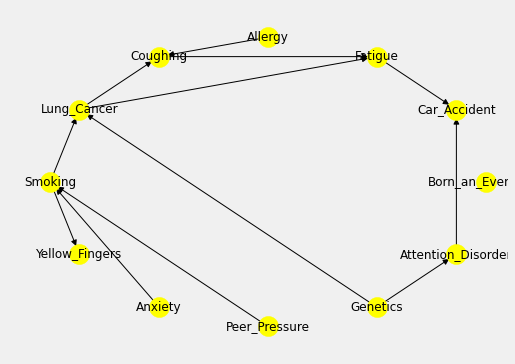

In [133]:
import dowhy
import pandas as pd
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = train, # df
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

In [134]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [140]:
# we first use only v0 and y
# we need to reshape them into the correct shape for our linear regression function
v0_vals = train['Coughing'].values.reshape(len(train['Coughing']), 1) # x
y_vals = train['Car_Accident'].values.reshape(len(train['Car_Accident']), 1) # Predcition y

# we first collect the extra variables we wish to include
W0_vals = train['Lung_Cancer'].values.reshape(len(train['Lung_Cancer']), 1)

# we need to combine all of the variables we're including into one array
backdoor = np.concatenate((v0_vals, W0_vals), axis = 1)


In [146]:
backdoor

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [0, 1],
       [1, 1],
       [1, 1]])

In [147]:
len(backdoor)

In [143]:
nn = []
no = []
on = []
oo = []

for i in backdoor:
    if i[0] == 0 and i[1] == 0:
        nn.append(1)
    elif i[0] == 0 and i[1] == 1:
        no.append(1)
    elif i[0] == 1 and i[1] == 0:
        on.append(1)
    else:
        oo.append(1)


In [155]:
print(sum(nn))
print(sum(no))
print(sum(on))
print(sum(oo))

379
220
178
1223


In [158]:
np.array([379, 220, 178, 1223]) / 2000

array([0.1895, 0.11  , 0.089 , 0.6115])

In [152]:
%matplotlib inline
import numpy as np
import pylab as pl
from numpy.random import uniform
from numpy import exp
from scipy.special import expit as sigmoid, logit

u = uniform(0,1,size=2000)

In [153]:
a = []
b = []
c = []
d = []

probs= [0.548117616476973 , 0.63782994795349, 0.724829041412937 , 0.792725521998307]

for i in u:
    if i < probs[0]:
        a.append(1)
    elif i > probs[0] and i < probs[1]:
        b.append(1)
    elif i > probs[1] and i < probs[2]:
        c.append(1)
    else:
        d.append(1)

In [154]:
print(sum(a))
print(sum(b))
print(sum(c))
print(sum(d))

1062
183
173
582


In [187]:
np.std(train['Lung_Cancer'])